# Human Activity Recongnition Using LSTM

This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing and Laying.

This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors (accelerometer and Gyroscope) in that smartphone. This experiment was video recorded to label the data manually.

### How data was recorded

By using the sensors(Gyroscope and accelerometer) in a smartphone, they have captured '3-axial linear acceleration'(_tAcc-XYZ_) from accelerometer and '3-axial angular velocity' (_tGyro-XYZ_) from Gyroscope with several variations. 

> prefix 't' in those metrics denotes time.

> suffix 'XYZ' represents 3-axial signals in X , Y, and Z directions.

### Feature names

1. These sensor signals are preprocessed by applying noise filters and then sampled in fixed-width windows(sliding windows) of 

    2.56 seconds each with 50% overlap. ie., each window has 128 readings. 


2. From Each window, a feature vector was obtianed by calculating variables from the time and frequency domain.
> In our dataset, each datapoint represents a window with different readings 

3. The accelertion signal was saperated into Body and Gravity acceleration signals(___tBodyAcc-XYZ___ and ___tGravityAcc-XYZ___) using some low pass filter with corner frequecy of 0.3Hz.


4. After that, the body linear acceleration and angular velocity were derived in time to obtian _jerk signals_ (___tBodyAccJerk-XYZ___ and ___tBodyGyroJerk-XYZ___). 


5. The magnitude of these 3-dimensional signals were calculated using the Euclidian norm. This magnitudes are represented as features with names like _tBodyAccMag_, _tGravityAccMag_, _tBodyAccJerkMag_, _tBodyGyroMag_ and _tBodyGyroJerkMag_.


6. Finally, We've got frequency domain signals from some of the available signals by applying a FFT (Fast Fourier Transform). These signals obtained were labeled with ___prefix 'f'___ just like original signals with ___prefix 't'___. These signals are labeled as ___fBodyAcc-XYZ___, ___fBodyGyroMag___ etc.,.


7. These are the signals that we got so far.

	+ tBodyAcc-XYZ
	+ tGravityAcc-XYZ
	+ tBodyAccJerk-XYZ
	+ tBodyGyro-XYZ
	+ tBodyGyroJerk-XYZ
	+ tBodyAccMag
	+ tGravityAccMag
	+ tBodyAccJerkMag
	+ tBodyGyroMag
	+ tBodyGyroJerkMag
	+ fBodyAcc-XYZ
	+ fBodyAccJerk-XYZ
	+ fBodyGyro-XYZ
	+ fBodyAccMag
	+ fBodyAccJerkMag
	+ fBodyGyroMag
	+ fBodyGyroJerkMag


8. We can esitmate some set of variables from the above signals. ie., We will estimate the following properties on each and every signal that we recoreded so far.

	+ ___mean()___: Mean value
	+ ___std()___: Standard deviation
	+ ___mad()___: Median absolute deviation 
	+ ___max()___: Largest value in array
	+ ___min()___: Smallest value in array
	+ ___sma()___: Signal magnitude area
	+ ___energy()___: Energy measure. Sum of the squares divided by the number of values. 
	+ ___iqr()___: Interquartile range 
	+ ___entropy()___: Signal entropy
	+ ___arCoeff()___: Autorregresion coefficients with Burg order equal to 4
	+ ___correlation()___: correlation coefficient between two signals
	+ ___maxInds()___: index of the frequency component with largest magnitude
	+ ___meanFreq()___: Weighted average of the frequency components to obtain a mean frequency
	+ ___skewness()___: skewness of the frequency domain signal 
	+ ___kurtosis()___: kurtosis of the frequency domain signal 
	+ ___bandsEnergy()___: Energy of a frequency interval within the 64 bins of the FFT of each window.
	+ ___angle()___: Angle between to vectors.


9. We can obtain some other vectors by taking the average of signals in a single window sample. These are used on the angle() variable'
`
	+ gravityMean
	+ tBodyAccMean
	+ tBodyAccJerkMean
	+ tBodyGyroMean
	+ tBodyGyroJerkMean


### Y_Labels(Encoded)

+ In the dataset, Y_labels are represented as numbers from 1 to 6 as their identifiers.

	- WALKING as __1__
	- WALKING_UPSTAIRS as __2__
	- WALKING_DOWNSTAIRS as __3__
	- SITTING as __4__
	- STANDING as __5__
	- LAYING as __6__
    
### Train and test data were saperated
 - The readings from ___70%___ of the volunteers were taken as ___trianing data___ and remaining ___30%___ subjects recordings were taken for ___test data___
 
### Data

* All the data is present in 'UCI_HAR_dataset/' folder in present working directory.
     - Feature names are present in 'UCI_HAR_dataset/features.txt'
     - ___Train Data___
         - 'UCI_HAR_dataset/train/X_train.txt'
         - 'UCI_HAR_dataset/train/subject_train.txt'
         - 'UCI_HAR_dataset/train/y_train.txt'
     - ___Test Data___
         - 'UCI_HAR_dataset/test/X_test.txt'
         - 'UCI_HAR_dataset/test/subject_test.txt'
         - 'UCI_HAR_dataset/test/y_test.txt'
         

### Data Size :
https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones
> 27 MB


##  Quick overview of the dataset :



* Accelerometer and Gyroscope readings are taken from 30 volunteers(referred as subjects) while performing the following 6 Activities.

    1. Walking     
    2. WalkingUpstairs 
    3. WalkingDownstairs 
    4. Standing 
    5. Sitting 
    6. Lying.


* Readings are divided into a window of 2.56 seconds with 50% overlapping. 

* Accelerometer readings are divided into gravity acceleration and body acceleration readings,
  which has x,y and z components each.

* Gyroscope readings are the measure of angular velocities which has x,y and z components.

* Jerk signals are calculated for BodyAcceleration readings.

* Fourier Transforms are made on the above time readings to obtain frequency readings.

* Now, on all the base signal readings., mean, max, mad, sma, arcoefficient, engerybands,entropy etc., are calculated for each window.

* We get a feature vector of 561 features and these features are given in the dataset.

* Each window of readings is a datapoint of 561 features.

### Problem Framework

* 30 subjects(volunteers) data is randomly split to 70%(21) test and 30%(7) train data.
* Each datapoint corresponds one of the 6 Activities.


## Problem Statement (Objective):

 + Given a new datapoint we have to predict the Activity

### Importing all neccessary Libraries

In [0]:
import pandas as pd
import numpy as np
#from keras.models import Sequential
from keras.layers import LSTM
from keras import backend as K
#from keras.layers.core import Dense, Dropout
import pdb
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

### Loading data and Defining methods 

In [26]:
# Load the Drive helper and mount
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#loading from drive
#filtered_data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Reviews.csv')
#filtered_data=pd.read_csv('Reviews.csv')#displaying
#filtered_data.head()
#print(filtered_data.shape) #looking at the number of attributes and size of the data
#filtered_data.head()

In [0]:
#this function will draw graph in every epoch updates

# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
import matplotlib.pyplot as plt

def plt_dynamic(x, vy, ty, ax, colors=['b']):
  ax.plot(x, vy, 'b', label="Validation Loss")
  ax.plot(x, ty, 'r', label="Train Loss")
  plt.legend()
  plt.grid()
  fig.canvas.draw()

In [0]:
# Data directory
DATADIR = 'UCI_HAR_Dataset'

In [0]:
# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

In [0]:
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

# Utility function to print the confusion matrix
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

In [0]:
# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# Utility function to load the load
def load_signals(subset):
    signals_data = []
    #pdb.set_trace()
    for signal in SIGNALS:
        filename = f'/content/drive/My Drive/Colab Notebooks/UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        #UCI_HAR_Dataset/train/Inertial Signals/body_acc_x_train.txt-internal location where file is being placed.
        signals_data.append(
            _read_csv(filename).as_matrix()
        ) 
    #pdb.set_trace()
    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

In [0]:

def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    #pdb.set_trace()
    filename = f'/content/drive/My Drive/Colab Notebooks/UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]
    #pdb.set_trace()
    return pd.get_dummies(y).as_matrix()

In [0]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    #pdb.set_trace()
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')
    #pdb.set_trace()
    return X_train, X_test, y_train, y_test

In [0]:
# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)

In [0]:
# Configuring a session
session_conf = tf.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)

In [0]:
# Import Keras
from keras import backend as K
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

In [0]:
# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [0]:
# Loading the train and test data
#pdb.set_trace()
X_train, X_test, Y_train, Y_test = load_data()
#pdb.set_trace()

In [40]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)

print(timesteps)
print(input_dim)
print(len(X_train))
print(n_classes)

128
9
7352
6


In [41]:
print(X_train.shape)

(7352, 128, 9)


### LSTM with 3 layered Architecture

In [0]:
# Initializing parameters
epochs = 100
batch_size = 64
n_hidden_for_layer1 = 64
n_hidden_for_layer2 = 32
n_hidden_for_layer3 = 16

In [0]:
# Initiliazing the sequential model
model = Sequential()

# Configuring the parameters
model.add(LSTM(n_hidden_for_layer1,return_sequences=True ,input_shape=(timesteps, input_dim)))#layer 1
model.add(BatchNormalization())
model.add(Dropout(0.5))# Adding a dropout layer

model.add(LSTM(n_hidden_for_layer2, return_sequences=True))#layer 2
model.add(BatchNormalization())
model.add(Dropout(0.25))# Adding a dropout layer

model.add(LSTM(n_hidden_for_layer3))#layer 3
model.add(BatchNormalization())
model.add(Dropout(0.25))# Adding a dropout layer

model.add(Dense(n_classes, activation='sigmoid'))# Adding a dense output layer with sigmoid activation

model.summary()


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128, 64)           18944     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 64)           256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 64)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128, 32)           12416     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 32)           128       
_________________________________________________________________
dropout_2 (Dropout)  

In [0]:
# Compiling the model
#import keras
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
%%time
# Training the model
history =model.fit(X_train,Y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, Y_test))


Instructions for updating:
Use tf.cast instead.
Train on 7352 samples, validate on 2947 samples
Epoch 1/100
7352/7352 [==============================] - 47s 6ms/step - loss: 1.2220 - acc: 0.6488 - val_loss: 0.9960 - val_acc: 0.6644
Epoch 2/100
7352/7352 [==============================] - 43s 6ms/step - loss: 0.8506 - acc: 0.7965 - val_loss: 0.8774 - val_acc: 0.7204
Epoch 3/100
7352/7352 [==============================] - 43s 6ms/step - loss: 0.6519 - acc: 0.7991 - val_loss: 0.6140 - val_acc: 0.7394
Epoch 4/100
7352/7352 [==============================] - 43s 6ms/step - loss: 0.5195 - acc: 0.7994 - val_loss: 0.8060 - val_acc: 0.6644
Epoch 5/100
7352/7352 [==============================] - 43s 6ms/step - loss: 0.4460 - acc: 0.7904 - val_loss: 1.0925 - val_acc: 0.5663
Epoch 6/100
7352/7352 [==============================] - 43s 6ms/step - loss: 0.3738 - acc: 0.7992 - val_loss: 0.3675 - val_acc: 0.7784
Epoch 7/100
7352/7352 [==============================] - 44s 6ms/step - loss: 0.3346 - a

In [0]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  4      391        92        0                   1   
STANDING                 0       82       450        0                   0   
WALKING                  0        0         0      482                   0   
WALKING_DOWNSTAIRS       1        0         0        3                 408   
WALKING_UPSTAIRS         0        0         0       12                   4   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            3  
STANDING                           0  
WALKING                           14  
WALKING_DOWNSTAIRS                 8  
WALKING_UPSTAIRS                 455  


Test loss: 0.3190983775916234
Test accuracy: 0.9239904988123515


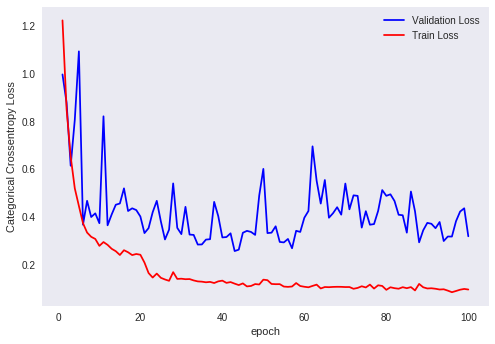

In [0]:
#ploting graph
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### LSTM 2 layered with larger Dropouts

In [0]:
# Initializing parameters
epochs = 50
batch_size = 64
n_hidden_for_layer1 = 64
n_hidden_for_layer2 = 32

In [54]:
# Initiliazing the sequential model
model = Sequential()

# Configuring the parameters
model.add(LSTM(n_hidden_for_layer1,return_sequences=True ,input_shape=(timesteps, input_dim)))#layer 1
model.add(BatchNormalization())
model.add(Dropout(1))# Adding a dropout layer

model.add(LSTM(n_hidden_for_layer2))#layer 2
model.add(BatchNormalization())
model.add(Dropout(0.5))# Adding a dropout layer

model.add(Dense(n_classes, activation='sigmoid'))# Adding a dense output layer with sigmoid activation

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 128, 64)           18944     
_________________________________________________________________
batch_normalization_5 (Batch (None, 128, 64)           256       
_________________________________________________________________
dropout_9 (Dropout)          (None, 128, 64)           0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 32)                12416     
_________________________________________________________________
batch_normalization_6 (Batch (None, 32)                128       
_________________________________________________________________
dropout_10 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 198       
Total para

In [0]:
# Compiling the model
#import keras
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [56]:
%%time
# Training the model
history =model.fit(X_train,Y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, Y_test))


Train on 7352 samples, validate on 2947 samples
Epoch 1/50
7352/7352 [==============================] - 32s 4ms/step - loss: 1.2673 - acc: 0.5744 - val_loss: 0.9692 - val_acc: 0.6837
Epoch 2/50
7352/7352 [==============================] - 29s 4ms/step - loss: 0.9093 - acc: 0.7433 - val_loss: 0.9316 - val_acc: 0.5674
Epoch 3/50
7352/7352 [==============================] - 29s 4ms/step - loss: 0.7558 - acc: 0.7671 - val_loss: 0.6775 - val_acc: 0.7587
Epoch 4/50
7352/7352 [==============================] - 29s 4ms/step - loss: 0.6160 - acc: 0.7837 - val_loss: 1.1395 - val_acc: 0.5263
Epoch 5/50
7352/7352 [==============================] - 29s 4ms/step - loss: 0.5311 - acc: 0.7939 - val_loss: 0.4926 - val_acc: 0.7635
Epoch 6/50
7352/7352 [==============================] - 29s 4ms/step - loss: 0.4726 - acc: 0.7947 - val_loss: 0.5168 - val_acc: 0.7479
Epoch 7/50
7352/7352 [==============================] - 29s 4ms/step - loss: 0.4219 - acc: 0.7956 - val_loss: 0.4620 - val_acc: 0.7431
Epoch 8

In [57]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  5      355       131        0                   0   
STANDING                 0       45       487        0                   0   
WALKING                  0        0         0      470                  22   
WALKING_DOWNSTAIRS       0        0         0        0                 409   
WALKING_UPSTAIRS         0        0         0        1                   1   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            0  
STANDING                           0  
WALKING                            4  
WALKING_DOWNSTAIRS                11  
WALKING_UPSTAIRS                 469  


Test loss: 0.25842093210849665
Test accuracy: 0.9253478113335596


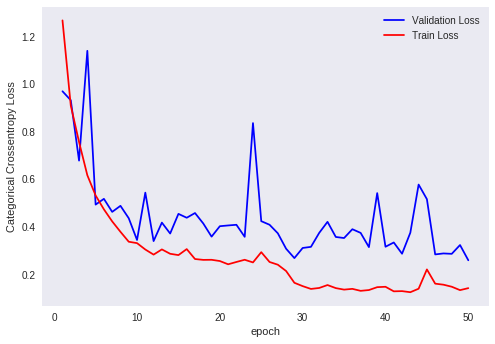

In [58]:
#ploting graph
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### LSTM 1 layered Architecture

In [0]:
# Initializing parameters
epochs = 75
batch_size = 64
n_hidden_for_layer1 = 128


In [71]:
# Initiliazing the sequential model
model = Sequential()

# Configuring the parameters
model.add(LSTM(n_hidden_for_layer1 ,input_shape=(timesteps, input_dim)))#layer 1
model.add(BatchNormalization())
model.add(Dropout(2))# Adding a dropout layer

model.add(Dense(n_classes, activation='sigmoid'))# Adding a dense output layer with sigmoid activation

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 128)               70656     
_________________________________________________________________
batch_normalization_9 (Batch (None, 128)               512       
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 774       
Total params: 71,942
Trainable params: 71,686
Non-trainable params: 256
_________________________________________________________________


In [0]:
# Compiling the model
#import keras
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [73]:
%%time
# Training the model
history =model.fit(X_train,Y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, Y_test))


Train on 7352 samples, validate on 2947 samples
Epoch 1/75
7352/7352 [==============================] - 32s 4ms/step - loss: 1.0788 - acc: 0.5306 - val_loss: 1.2120 - val_acc: 0.5860
Epoch 2/75
7352/7352 [==============================] - 29s 4ms/step - loss: 0.7887 - acc: 0.6085 - val_loss: 1.4075 - val_acc: 0.5524
Epoch 3/75
7352/7352 [==============================] - 29s 4ms/step - loss: 0.7283 - acc: 0.6117 - val_loss: 0.7540 - val_acc: 0.5914
Epoch 4/75
7352/7352 [==============================] - 29s 4ms/step - loss: 0.6892 - acc: 0.6291 - val_loss: 0.8100 - val_acc: 0.5772
Epoch 5/75
7352/7352 [==============================] - 29s 4ms/step - loss: 0.6373 - acc: 0.6542 - val_loss: 0.8774 - val_acc: 0.5931
Epoch 6/75
7352/7352 [==============================] - 29s 4ms/step - loss: 0.6372 - acc: 0.6425 - val_loss: 0.8003 - val_acc: 0.6210
Epoch 7/75
7352/7352 [==============================] - 29s 4ms/step - loss: 0.6181 - acc: 0.6538 - val_loss: 0.7382 - val_acc: 0.6542
Epoch 8

In [74]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 537        0         0        0                   0   
SITTING                  4      358       126        0                   0   
STANDING                 0       57       474        1                   0   
WALKING                  0        0         0      467                  29   
WALKING_DOWNSTAIRS       0        0         0        3                 413   
WALKING_UPSTAIRS         0        0         2        3                   5   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                             0  
SITTING                            3  
STANDING                           0  
WALKING                            0  
WALKING_DOWNSTAIRS                 4  
WALKING_UPSTAIRS                 461  


Test loss: 0.3164710504999816
Test accuracy: 0.9195792331184255


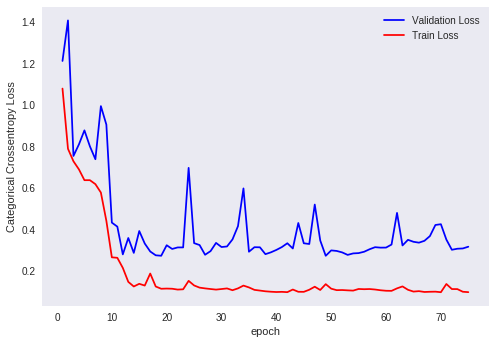

In [75]:
#ploting graph
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## Conclusion :



| Sr.no| No. Of LSTM Layers | Epochs | Optimiser | Accuracy  | Loss|
| --------|----------------------------------|--------------|-----------------|------------------|--------| 
| 1.| 3 (h1=64),(h2=32),(h3=16)|100 | Adam | 92.39%  | 31.9%|
| 2.| 2 (h1=64),(h2=32) |50 | Adam | 92.53%  | 25.84%|
| 3.| 1 (h1=64) |75 | Adam | 91.95%  | 31.64%|



                                                          ---xxx---